#Titanic

###2-Cargamos el Dataset titanic.csv y ponemos como índice el nombre del pasajero

In [0]:
import pandas as pd
titanic=pd.read_csv('https://raw.githubusercontent.com/estherps/titanic/master/titanic.csv', index_col=3, sep='\t')

###3-Eliminamos las columnas ticket number y cabina

In [2]:
titanic = titanic.drop(['Ticket', 'Cabin'], axis=1)
print(titanic.shape)

(156, 9)


### 4- Análisis de las columnas y sustitución de valores nulos


Vemos en qué columnas hay valores nulos:

In [3]:
missing_values_count=titanic.isnull().sum()
print(missing_values_count)

PassengerId     0
Survived        0
Pclass          0
Sex             0
Age            30
SibSp           0
Parch           0
Fare            0
Embarked        1
dtype: int64


Observamos que tanto la columna "Age" como "Embarked" tienen valores Nulos. Vamos a proceder a rellenar esos valores con la media en el caso de "Age" por ser una variable numérica y con la moda en el caso de "Embarked" por ser categórica.
Calculamos la media de "Age" y Moda de "Embarked".

In [4]:
media = titanic["Age"].mean()
print("Esta es la media",media, "de Age" )
moda = titanic["Embarked"].mode()
print("Esta es la moda", moda, "de Embarked")

Esta es la media 28.141507936507935 de Age
Esta es la moda 0    S
dtype: object de Embarked


Rellenamos los valores nulos de la columna "Age" con su media que hemos visto que es 28,14.

In [5]:
from sklearn.preprocessing import Imputer
imp=Imputer(missing_values="NaN", strategy="mean" )
imp.fit(titanic[["Age"]])
titanic["Age"]=imp.transform(titanic[["Age"]])

/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:58: DeprecationWarning: Class Imputer is deprecated; Imputer was deprecated in version 0.20 and will be removed in 0.22. Import impute.SimpleImputer from sklearn instead.
  warnings.warn(msg, category=DeprecationWarning)


Rellenamos el valor nulo de la columna "Embarked" con S,  que es el valor más repetido.

In [0]:
titanic['Embarked'] = titanic['Embarked'].fillna("S")

Calculamos si sigue habiendo algún valor nulo y vemos que no hay.

In [7]:
missing_values_count=titanic.isnull().sum()
print(missing_values_count)

PassengerId    0
Survived       0
Pclass         0
Sex            0
Age            0
SibSp          0
Parch          0
Fare           0
Embarked       0
dtype: int64


Creamos la variable "Survived_etiqueta" con la etiqueta de la variable "Survived". 0 es No y 1 Si.

In [0]:
import numpy as np
titanic['Survived_etiqueta'] = np.where(titanic.Survived == 0, 'No', 'Yes')

Categorizamos la variable Sexo: Male- 0 y Female -1

In [0]:
titanic['Sex'] = np.where(titanic.Sex == 'male' , 0, 1)


Categorizamos la variable Embarked: C-0, Q-1 y S-2

In [10]:

titanic.Embarked[titanic.Embarked == 'C'] = 0
titanic.Embarked[titanic.Embarked == 'Q'] = 1
titanic.Embarked[titanic.Embarked == 'S'] = 2

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.


Hacemos un conteo de cuántos No han sobrevivido y cuántos Sí han sobrevivido

In [11]:
diagnosis_all=list(titanic.shape)[0]
diagnosis_categories = list(titanic['Survived'].value_counts())
print("\n \t The data has {} diagnosis, {} No and {} Yes.".format(diagnosis_all, diagnosis_categories[0],diagnosis_categories[1]))


 	 The data has 156 diagnosis, 102 No and 54 Yes.


### 5- Separamos el dataset en Train y Test

In [0]:
from sklearn.model_selection import train_test_split

In [0]:

x = titanic.loc[:, ['PassengerId', 'Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare', 'Embarked']]
y= titanic.loc[:, 'Survived']

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state=42)


Vemos como está formado el modelo, cuantos casos son de Train y cuántos son de Test. Entrenamiento 124 casos y 32 casos de Test.

In [14]:
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(124, 8)
(32, 8)
(124,)
(32,)


### 6- Entrenamiento de los diferentes clasificadores para predecir la variable "Survived"

#### 6.1 - Clasificador: DecisionTreeClassifier

Creamos el objeto clasificador utilizando el método de **árbol de decisión:**

In [0]:
from sklearn import tree
my_tree = tree.DecisionTreeClassifier()

Entrenamos el modelo con x_train e y_train:

In [16]:
print(my_tree.fit(x_train, y_train))

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')


Vemos lo bueno que es nuestro modelo, la precisión:

In [17]:
print('Accuracy of Decision Tree classifier on training set: {:.2f}'
     .format(my_tree.score(x_train, y_train)))
print('Accuracy of Decision Tree classifier on test set: {:.2f}'
     .format(my_tree.score(x_test, y_test)))

Accuracy of Decision Tree classifier on training set: 1.00
Accuracy of Decision Tree classifier on test set: 0.75


Observamos que nuestro modelo de entrenamiento tiene una precisión de 1, el valor máximo, por lo que se ajusta perfectamente a los datos que tiene para entrenar.

Para evaluar lo bueno que es nuestro modelo, primero predecimos y lo vemos con valores reales. Vemos que tenemos una precisión de 0.75 ; es decir, el 75% de las veces acierta nuestro modelo.

In [0]:
from sklearn import metrics
prediction=my_tree.predict(x_test)

In [19]:
print(prediction)
print("Accuracy {:.2f} ".format(metrics.accuracy_score(prediction,y_test)))

[0 0 1 0 0 0 0 0 0 0 1 0 0 0 1 0 0 0 0 0 1 1 0 1 1 0 0 0 0 0 0 0]
Accuracy 0.75 


Juntamos en un dataset los valores predichos y reales. 

In [20]:
test_predictions = pd.DataFrame(list(zip(prediction, y_test)), columns=['predicted', 'real'])
test_predictions.groupby(['predicted', 'real']).apply(lambda x: len(x))
print(pd.DataFrame(test_predictions.groupby(['predicted', 'real']).size()))

                 0
predicted real    
0         0     19
          1      6
1         0      2
          1      5


Hemos detectado 19 personas que no sobrevivieron y se han predicho correctamente. Hemos detectado 6 personas que no sobrevivieron pero que realmente sobrevivieron. Hemos detectado 5 casos que sobrevivieron y realemente sobrevivieron, pero 2 casos que sobrevivieron y en realidad no sobrevivieron.

**Matriz de confusión** para ver que valores han sido correctamente predichos y cuales no.

In [0]:
from sklearn.metrics import confusion_matrix
confusion = confusion_matrix(y_test, prediction)

In [22]:
print('Decision tree classifier (max_depth = 2)\n', confusion)

Decision tree classifier (max_depth = 2)
 [[19  2]
 [ 6  5]]


In [0]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
df_cm = pd.DataFrame(confusion, index = [i for i in range(0,2)], columns = [i for i in range(0,2)])

Text(0.5, 15.0, 'Predicted label')

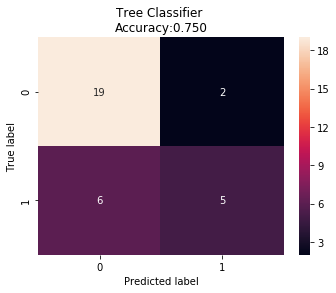

In [24]:
plt.figure(figsize=(5.5,4))
sns.heatmap(df_cm, annot=True)
plt.title('Tree Classifier \nAccuracy:{0:.3f}'.format(accuracy_score(y_test, prediction)))
plt.ylabel('True label')
plt.xlabel('Predicted label')

In [25]:
from sklearn.metrics import classification_report
print(classification_report(y_test, prediction))

              precision    recall  f1-score   support

           0       0.76      0.90      0.83        21
           1       0.71      0.45      0.56        11

   micro avg       0.75      0.75      0.75        32
   macro avg       0.74      0.68      0.69        32
weighted avg       0.74      0.75      0.73        32



###Para la comparación de los clasificadores:

#### 6.1 -  Clasificador: DecisionTreeClassifier

In [0]:
accuracy_all = []
cvs_all = []

In [27]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import cross_val_score
import numpy as np
import time
start = time.time()

clf = DecisionTreeClassifier()
clf.fit(x_train, y_train)
prediction = clf.predict(x_test)
scores = cross_val_score(clf, x, y, cv=5)

end = time.time()

accuracy_all.append(accuracy_score(prediction, y_test))
cvs_all.append(np.mean(scores))

print("Dedicion Tree Accuracy: {0:.2%}".format(accuracy_score(prediction, y_test)))
print("Cross validation score: {0:.2%} (+/- {1:.2%})".format(np.mean(scores), np.std(scores)*2))
print("Execution time: {0:.5} seconds \n".format(end-start))


Dedicion Tree Accuracy: 75.00%
Cross validation score: 59.85% (+/- 29.30%)
Execution time: 0.031855 seconds 



#### 6.2 - Clasificador: SGDClassifier

In [28]:
from sklearn.linear_model import SGDClassifier
from sklearn.model_selection import cross_val_score
import numpy as np
import time

start = time.time()

clf = SGDClassifier()
clf.fit(x_train, y_train)
prediction = clf.predict(x_test)
scores = cross_val_score(clf, x, y, cv=5)

end = time.time()

accuracy_all.append(accuracy_score(prediction, y_test))
cvs_all.append(np.mean(scores))

print("SGD Classifier Accuracy: {0:.2%}".format(accuracy_score(prediction, y_test)))
print("Cross validation score: {0:.2%} (+/- {1:.2%})".format(np.mean(scores), np.std(scores)*2))
print("Execution time: {0:.5} seconds \n".format(end-start))

SGD Classifier Accuracy: 34.38%
Cross validation score: 52.06% (+/- 28.65%)
Execution time: 0.029255 seconds 



/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/stochastic_gradient.py:166: FutureWarning: max_iter and tol parameters have been added in SGDClassifier in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/stochastic_gradient.py:166: FutureWarning: max_iter and tol parameters have been added in SGDClassifier in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/stochastic_gradient.py:166: FutureWarning: max_iter and tol parameters have been added in SGDClassifier in 0.19. If both are left unset, they default to max_iter=5 and tol=No

#### 6.3 - RidgeClassifier

In [29]:
from sklearn.linear_model import RidgeClassifier
from sklearn.model_selection import cross_val_score

import time

start = time.time()


clf = RidgeClassifier()
clf.fit(x_train, y_train)
prediction = clf.predict(x_test)
scores = cross_val_score(clf, x, y, cv=5)

end = time.time()

accuracy_all.append(accuracy_score(prediction, y_test))
cvs_all.append(np.mean(scores))

print("Ridge Classifier Accuracy: {0:.2%}".format(accuracy_score(prediction, y_test)))
print("Cross validation score: {0:.2%} (+/- {1:.2%})".format(np.mean(scores), np.std(scores)*2))
print("Execution time: {0:.5} seconds \n".format(end-start))



Ridge Classifier Accuracy: 68.75%
Cross validation score: 80.09% (+/- 6.62%)
Execution time: 0.057801 seconds 



#### 6.4 - KNeighborsClassifier

In [30]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import cross_val_score
import time

start = time.time()

clf = KNeighborsClassifier()
clf.fit(x_train, y_train)
prediction = clf.predict(x_test)
scores = cross_val_score(clf, x, y, cv=5)

end = time.time()

accuracy_all.append(accuracy_score(prediction, y_test))
cvs_all.append(np.mean(scores))

print("Accuracy: {0:.2%}".format(accuracy_score(prediction, y_test)))
print("Cross validation score: {0:.2%} (+/- {1:.2%})".format(np.mean(scores), np.std(scores)*2))
print("Execution time: {0:.5} seconds \n".format(end-start))


Accuracy: 50.00%
Cross validation score: 40.63% (+/- 29.26%)
Execution time: 0.039651 seconds 



#### 6.5 - RandomForestClassifier

In [31]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import cross_val_score
import numpy as np
import time

start = time.time()
clf = RandomForestClassifier(random_state=0)
clf.fit(x_train, y_train)
prediction = clf.predict(x_test)
scores = cross_val_score(clf, x, y, cv=5)

end = time.time()

accuracy_all.append(accuracy_score(prediction, y_test))
cvs_all.append(np.mean(scores))

print("Random Forest Accuracy: {0:.2%}".format(accuracy_score(prediction, y_test)))
print("Cross validation score: {0:.2%} (+/- {1:.2%})".format(np.mean(scores), np.std(scores)*2))
print("Execution time: {0:.5} seconds \n".format(end-start))

Random Forest Accuracy: 78.12%
Cross validation score: 66.91% (+/- 30.62%)
Execution time: 0.07983 seconds 



/usr/local/lib/python3.6/dist-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


#### 6.6 - GaussianNB

In [32]:
from sklearn.naive_bayes import GaussianNB

start = time.time()

clf = GaussianNB()
clf.fit(x_train, y_train)
prediction = clf.predict(x_test)
scores = cross_val_score(clf, x, y, cv=5)

end = time.time()

accuracy_all.append(accuracy_score(prediction, y_test))
cvs_all.append(np.mean(scores))

print("Accuracy: {0:.2%}".format(accuracy_score(prediction, y_test)))
print("Cross validation score: {0:.2%} (+/- {1:.2%})".format(np.mean(scores), np.std(scores)*2))
print("Execution time: {0:.5} seconds \n".format(end-start))

Accuracy: 71.88%
Cross validation score: 74.38% (+/- 10.24%)
Execution time: 0.029246 seconds 



### 7- Rankeo de los clasificadores por su performance, medido como % de aciertos.

In [33]:
index = ['KNeighbors', 'SGD', 'Ridge', 'RandomForest', 'DecisionTree', 'GaussianNB']
d = {"model": index, 'accuracy_all':accuracy_all, 'cvs_all':cvs_all}

df = pd.DataFrame(d, index= index)
df

,model,accuracy_all,cvs_all
KNeighbors,KNeighbors,0.75000,0.598468
SGD,SGD,0.34375,0.520632
Ridge,Ridge,0.68750,0.800927
RandomForest,RandomForest,0.50000,0.406317
DecisionTree,DecisionTree,0.78125,0.669073
GaussianNB,GaussianNB,0.71875,0.743844


Representamos de forma gráfica la comparación de los clasificadores según su accurance y cross validation.

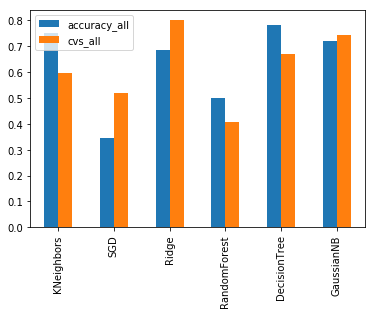

In [34]:
df.plot.bar()

En Accurance nos sale mejor Decision Tree (78%), sin embargo en Cross Validation Ridge (80%). Vemos que el modelo naive nos sale bastante bien en estas dos medidas.